In [29]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#import datasts
netflix_data1 = pd.read_csv("netflix.csv")
netflix_data2 = pd.read_csv("netflix2.csv")
prime_data = pd.read_csv("prime.csv")
amazon_data = pd.read_csv("amazon.csv", encoding= 'unicode_escape')


In [30]:
netflix_data1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [31]:
netflix_data2.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [32]:
prime_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [33]:
amazon_data.head()

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+


In [34]:
#cleaning prime data delete unwanted columns and rename columns
prime_data = prime_data.drop(['description', 'date_added','show_id','rating'], axis=1)
prime_data.rename(columns={'listed_in':'Genre'}, inplace=True)
prime_data = prime_data.dropna(subset=['cast', 'director'])
prime_data.head()

,type,title,director,cast,country,release_year,duration,Genre
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2014,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2018,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2017,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2014,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,1989,45 min,"Drama, Fantasy"


In [35]:
#cleaning amazon data delete unwanted columns and rename columns
amazon_data = amazon_data.dropna(subset=['Name of the show', 'IMDb rating'])
amazon_data['No of seasons available'] = amazon_data['No of seasons available'].astype('int64')
amazon_data['Year of release'] = amazon_data['Year of release'].astype('int64')
amazon_data = amazon_data.drop(['S.no.'], axis=1)
amazon_data.rename(columns={'No of seasons available':'seasons'}, inplace=True)
amazon_data.rename(columns={'Name of the show':'title'}, inplace=True)
amazon_data.rename(columns={'Year of release':'release_year'}, inplace=True)
amazon_data.rename(columns={'IMDb rating':'IMDB'}, inplace=True)


In [36]:
amazon_data.head()

,title,release_year,seasons,Language,Genre,IMDB,Age of viewers
0,Pataal Lok,2020,1,Hindi,Drama,7.5,18+
1,Upload,2020,1,English,Sci-fi comedy,8.1,16+
2,The Marvelous Mrs. Maisel,2017,3,English,"Drama, Comedy",8.7,16+
3,Four More Shots Please,2019,2,Hindi,"Drama, Comedy",5.3,18+
4,Fleabag,2016,2,English,Comedy,8.7,18+


In [37]:
#cleaning netflix data delete unwanted columns and rename columns
netflix_data1 = netflix_data1.dropna(subset=['country', 'cast', 'director','duration'])
netflix_data1 = netflix_data1.drop(['show_id', 'date_added', 'rating', 'description'], axis=1)
netflix_data1.rename(columns={'listed_in':'Genre'}, inplace=True)
netflix_data1.head()

,type,title,director,cast,country,release_year,duration,Genre
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,125 min,"Dramas, Independent Movies, International Movies"
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,9 Seasons,"British TV Shows, Reality TV"
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,104 min,"Comedies, Dramas"
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,127 min,"Dramas, International Movies"
24,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,166 min,"Comedies, International Movies, Romantic Movies"


In [38]:
#cleaning netflix data 2 delete unwanted columns and rename columns
netflix_data2 = netflix_data2.dropna(subset=['duration','rating','genre'])
netflix_data2 = netflix_data2.drop(['description', 'certificate'], axis=1)
netflix_data2.rename(columns={'stars':'cast'}, inplace=True)
netflix_data2.rename(columns={'rating':'IMDB'}, inplace=True)
netflix_data2.head()

,title,year,duration,genre,IMDB,cast,votes
0,Cobra Kai,(2018– ),30 min,"Action, Comedy, Drama",8.5,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),58 min,"Biography, Drama, History",8.7,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),46 min,"Crime, Drama",8.9,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),356 min,"Drama, Horror, Mystery",5.9,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),24 min,"Animation, Action, Adventure",8.6,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


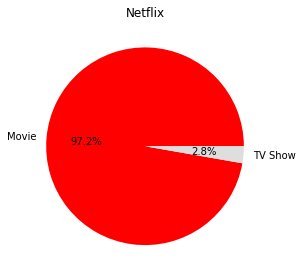

In [39]:
#in netflix data movies and tv shows in pie chart
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Netflix')
plt.pie(netflix_data1['type'].value_counts(), labels=netflix_data1['type'].value_counts().index, autopct='%1.1f%%' ,colors=['#ff0000', '#dedede'])
plt.show()


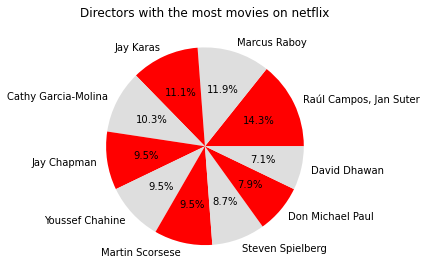

In [40]:
#in netflix data top 10 directors in pie chart
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Directors with the most movies on netflix')
plt.pie(netflix_data1['director'].value_counts().head(10), labels=netflix_data1['director'].value_counts().head(10).index, autopct='%1.1f%%' ,colors=['#ff0000', '#dedede'])
plt.show()

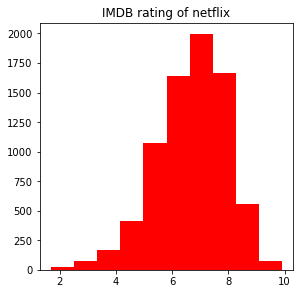

In [41]:
#showing imdb rating of netflix_data2 in histogram
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('IMDB rating of netflix')
plt.hist(netflix_data2['IMDB'], bins=10, color='#ff0000')
plt.show()

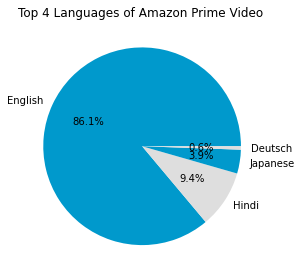

In [42]:
#showing top 4 languages of amazon prime video in pie chart
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Top 4 Languages of Amazon Prime Video ')
plt.pie(amazon_data['Language'].value_counts().head(4), labels=amazon_data['Language'].value_counts().head(4).index, autopct='%1.1f%%' ,colors=['#0099CC', '#dedede'])
plt.show()


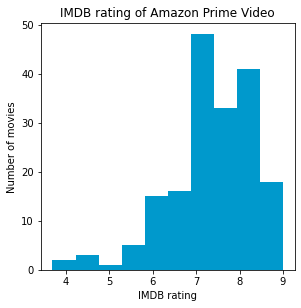

In [43]:
#showing imdb rating of amazon prime video in histogram
plt.figure(figsize=(10,10))  
plt.subplot(2,2,1)
plt.hist(amazon_data['IMDB'], bins=10, color='#0099CC')  
plt.title('IMDB rating of Amazon Prime Video')
plt.xlabel('IMDB rating')
plt.ylabel('Number of movies')
plt.show()

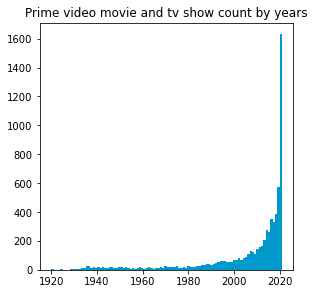

In [44]:
#showing realase year of prime_data in histogram
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Prime video movie and tv show count by years')
plt.hist(prime_data['release_year'], bins=100, color='#0099CC')
plt.show()

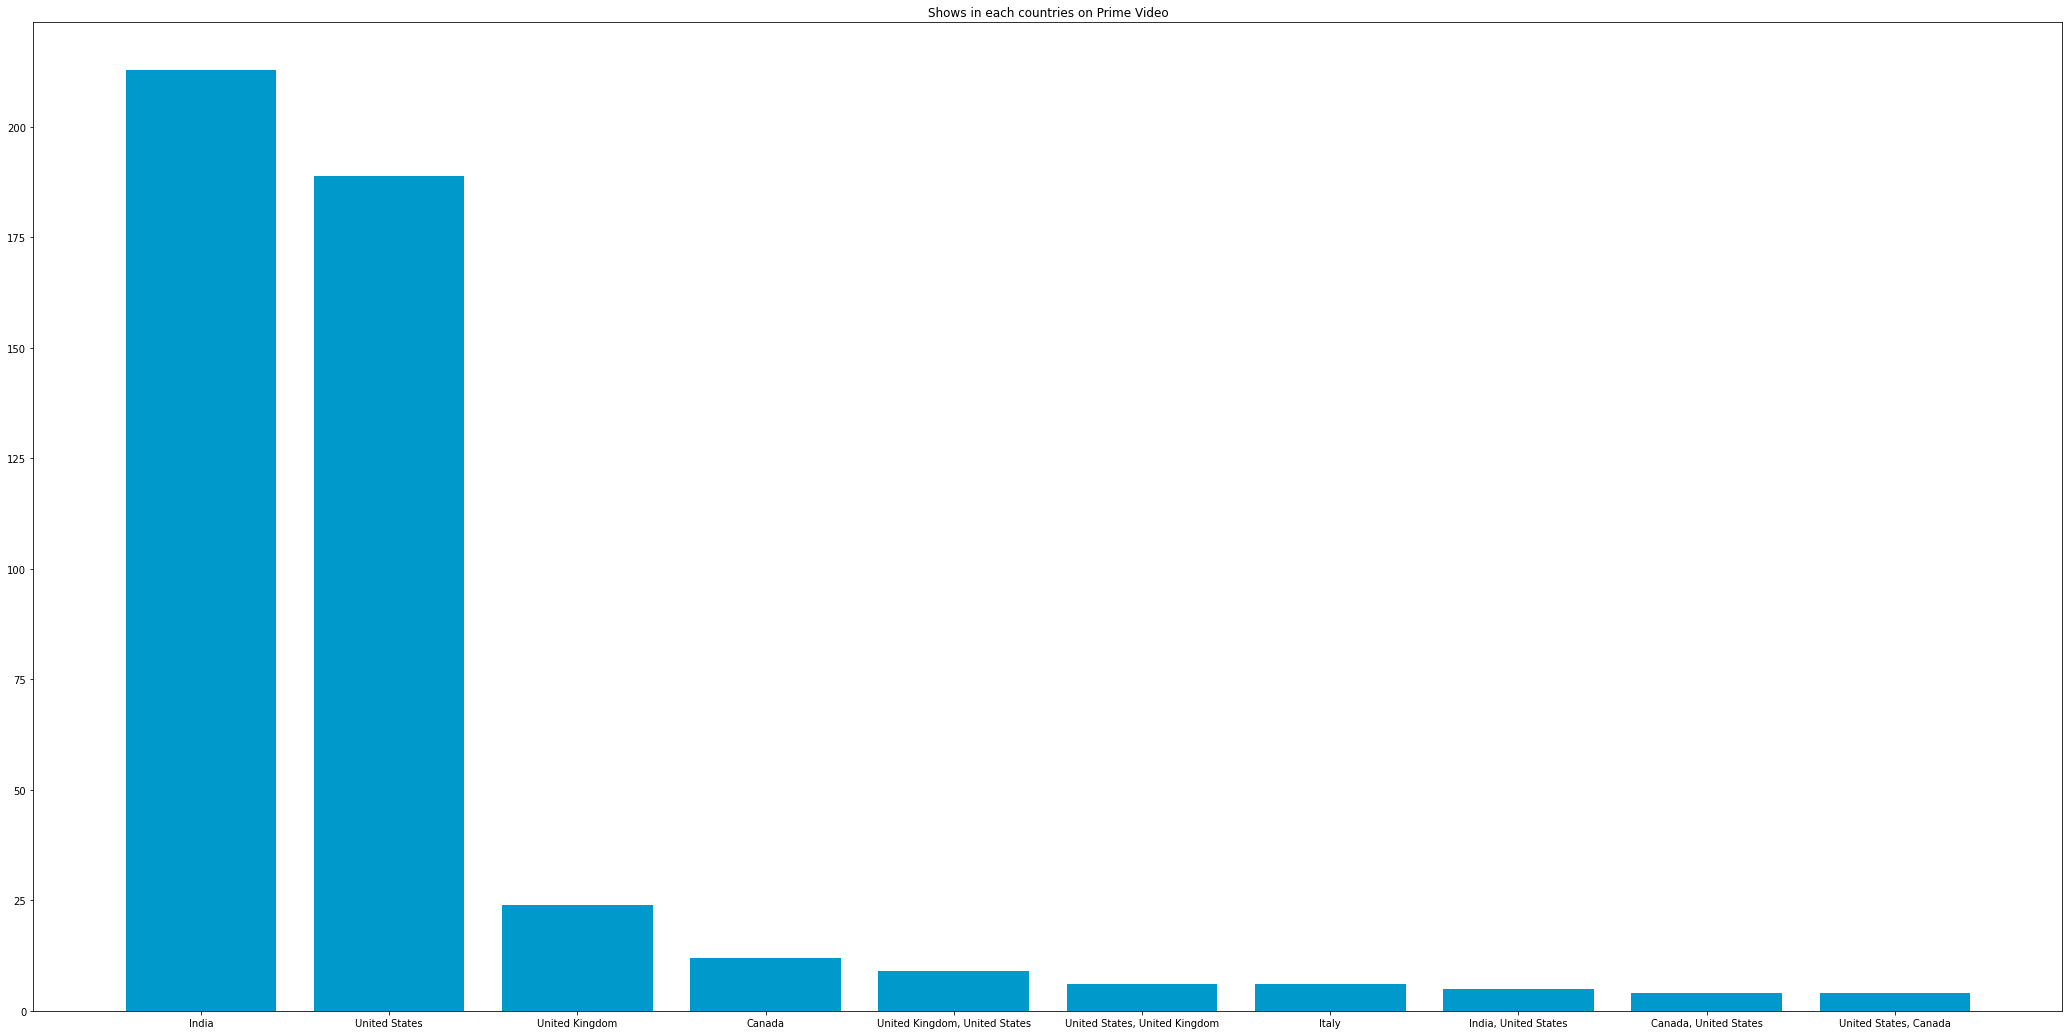

In [45]:
#showed how many show in each countries on prime_data in bar chart
plt.figure(figsize=(80,40))
plt.subplot(2,2,1)
plt.title('Shows in each countries on Prime Video')
plt.bar(prime_data['country'].value_counts().head(10).index, prime_data['country'].value_counts().head(10), color='#0099CC')
plt.show()


In [46]:
# merge operation for 2 netflix data on 1 dataset and also seperated the genres in netflix_data 
netflix_data = pd.merge(netflix_data1, netflix_data2, on='title', how='inner')
netflix_data = netflix_data.drop(['cast_y', 'year', 'duration_y', 'Genre'], axis=1)

netflix_data.rename(columns={'duration_x':'duration'}, inplace=True)
netflix_data.rename(columns={'cast_x':'cast'}, inplace=True)
netflix_data = netflix_data[netflix_data['type'] == 'Movie']
netflix_data['duration'] = netflix_data['duration'].str.replace(' min' , '')
netflix_data['duration'] = netflix_data['duration'].astype(int)

netflix_data['genre1'] = netflix_data['genre'].apply(lambda x: x.split(',')[0])
netflix_data['genre2'] = netflix_data['genre'].apply(lambda x : x.split(',')[1] if (len(x.split(',')) > 1) else 'none')
netflix_data['genre3'] = netflix_data['genre'].apply(lambda x : x.split(',')[2] if (len(x.split(',')) > 2) else 'none')
netflix_data.drop('genre', axis=1, inplace=True)
netflix_data.head()


,type,title,director,cast,country,release_year,duration,IMDB,votes,genre1,genre2,genre3
0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,125,7.0,710,Drama,none,none
1,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,104,6.3,"13,097",Comedy,Drama,none
2,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,127,5.5,"1,177",Drama,Romance,Thriller
3,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,1975,124,8.1,"600,404",Adventure,Thriller,none
4,Movie,Jaws 2,Jeannot Szwarc,"Roy Scheider, Lorraine Gary, Murray Hamilton, ...",United States,1978,116,5.8,"78,737",Adventure,Horror,Thriller


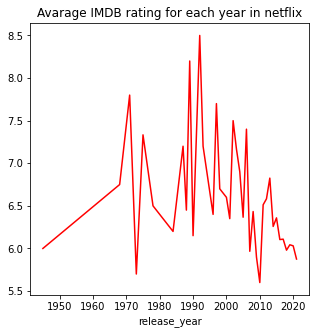

In [47]:
# avarage imdb rating for each year in netflix_data
netflix_data.groupby('release_year')['IMDB'].mean().plot(kind='line', figsize=(5,5), color='#ff0000')
plt.title('Avarage IMDB rating for each year in netflix')
plt.show()


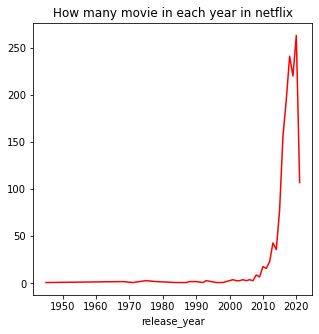

In [48]:
#showing how many movies release in each year in netflix dataset on chart
netflix_data.groupby('release_year')['title'].count().plot(kind='line', figsize=(5,5), color='#ff0000')
plt.title('How many movie in each year in netflix')
plt.show()

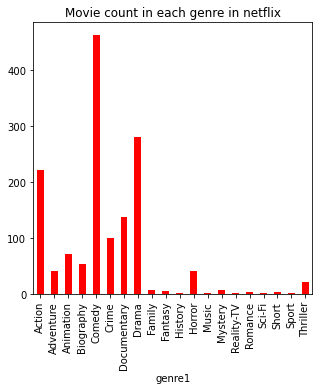

In [49]:
#showing how many genres in netflix data
netflix_data.groupby('genre1')['title'].count().plot(kind='bar', figsize=(5,5), color='#ff0000')
plt.title('Movie count in each genre in netflix')
plt.show()

## Lineer Regression Model

In [50]:
#train lineer regression model for predict duration of movie 
from sklearn.linear_model import LinearRegression

netflix_data_year = netflix_data.copy()
netflix_data_year = netflix_data_year.drop(['title', 'type', 'genre1', 'genre2', 'genre3', 'cast', 'country', 'votes', 'IMDB','director','cast'], axis=1)
netflix_data_year['release_year'] = netflix_data_year['release_year'].astype(int)
netflix_data_year['duration'] = netflix_data_year['duration'].astype(float)

netflix_data_year = netflix_data_year.groupby('release_year')['duration'].mean().reset_index()
netflix_data_year = netflix_data_year[netflix_data_year['release_year'] >= 1945]
netflix_data_year = netflix_data_year[netflix_data_year['release_year'] <= 2022]
netflix_data_year


netflix_data_year_model = LinearRegression()
netflix_data_year_model.fit(netflix_data_year['release_year'].values.reshape(-1,1), netflix_data_year['duration'].values.reshape(-1,1))

predict_year = []
for i in range(1900, 2040):
    predict_year.append([i, netflix_data_year_model.predict([[i]])[0][0]])
predict_year

#mean absolute error
mean_absolute_error(netflix_data_year['duration'].values.reshape(-1,1), netflix_data_year_model.predict(netflix_data_year['release_year'].values.reshape(-1,1)))

17.662110952255553

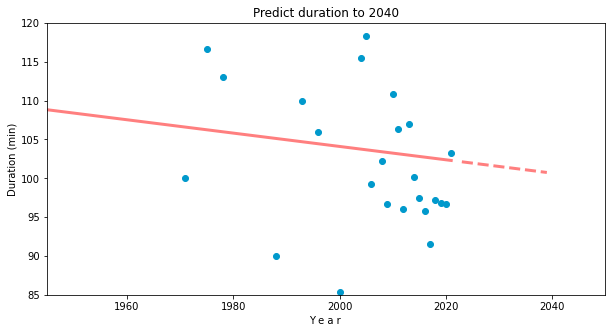

In [51]:
#predict duration to 2040 and show it on graph after 2022 line is dashed
plt.figure(figsize=(10,5))
plt.xlabel('Y e a r ')
plt.ylabel('Duration (min)')
plt.scatter(netflix_data_year['release_year'], netflix_data_year['duration'], color='#0099CC')
plt.plot([i[0] for i in predict_year if i[0] < 2022], [i[1] for i in predict_year if i[0] < 2022], color='#ff0000', linewidth=3, alpha=0.5, label='Predict')
plt.plot([i[0] for i in predict_year if i[0] > 2022], [i[1] for i in predict_year if i[0] > 2022], color='#ff0000', linewidth=3, alpha=0.5, linestyle='dashed', label='Predict') 
plt.xlim(1945, 2050)
plt.ylim(85, 120)
plt.title('Predict duration to 2040')
plt.show()


## MLPRegressor

In [52]:
#encoding string values to meaningful int values for train model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#creating label encoder
labelencoder = LabelEncoder()

#using label encoder to encode 
netflix_data['director'] = labelencoder.fit_transform(netflix_data['director'].astype(str))
manufac = {l: i for i, l in enumerate(labelencoder.classes_)}

netflix_data['genre1'] = labelencoder.fit_transform(netflix_data['genre1'].astype(str))
trans = {l: i for i, l in enumerate(labelencoder.classes_)}

netflix_data.head()

,type,title,director,cast,country,release_year,duration,IMDB,votes,genre1,genre2,genre3
0,Movie,Sankofa,412,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,125,7.0,710,7,none,none
1,Movie,The Starling,1143,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,104,6.3,"13,097",4,Drama,none
2,Movie,Je Suis Karl,208,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,127,5.5,"1,177",7,Romance,Thriller
3,Movie,Jaws,1109,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,1975,124,8.1,"600,404",1,Thriller,none
4,Movie,Jaws 2,491,"Roy Scheider, Lorraine Gary, Murray Hamilton, ...",United States,1978,116,5.8,"78,737",1,Horror,Thriller


In [53]:
from sklearn.model_selection import train_test_split

# split data to X and y
X = netflix_data[['director', 'duration', 'genre1']]
y = netflix_data['IMDB']


# train and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
from sklearn.neural_network import MLPRegressor
classifier = MLPRegressor(hidden_layer_sizes=(4, 4, 4), max_iter= 1000, verbose= True)

#fitting our model
classifier.fit(X_train, y_train)

#predicting 
prediction = classifier.predict(X_test)



#error
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_test, prediction)

print(error)

Iteration 1, loss = 3420.44033191
Iteration 2, loss = 2492.93702608
Iteration 3, loss = 1790.50426547
Iteration 4, loss = 1247.06386612
Iteration 5, loss = 862.16154669
Iteration 6, loss = 586.11051804
Iteration 7, loss = 396.18292927
Iteration 8, loss = 262.79148625
Iteration 9, loss = 171.63205469
Iteration 10, loss = 110.48068023
Iteration 11, loss = 70.47442825
Iteration 12, loss = 45.06215719
Iteration 13, loss = 29.08164909
Iteration 14, loss = 19.29189411
Iteration 15, loss = 13.32084954
Iteration 16, loss = 9.97609579
Iteration 17, loss = 8.02516822
Iteration 18, loss = 6.96423324
Iteration 19, loss = 6.40927844
Iteration 20, loss = 6.10969323
Iteration 21, loss = 5.92938509
Iteration 22, loss = 5.78753242
Iteration 23, loss = 5.67201360
Iteration 24, loss = 5.55575993
Iteration 25, loss = 5.43331729
Iteration 26, loss = 5.30410891
Iteration 27, loss = 5.16242104
Iteration 28, loss = 5.01758191
Iteration 29, loss = 4.85663569
Iteration 30, loss = 4.69979537
Iteration 31, loss =

In [55]:
print(prediction)

[ 6.61691672  5.64572151  5.10879799  5.01361425  6.07758343  6.14608259
  6.10789287  5.68911793  5.62996543  5.75258067  5.98403309  5.79663476
  6.37627417  5.40757669  6.30481694  6.86572695  6.34907285  6.53840388
  6.60205344  5.59324379  6.19330293  4.89354057  5.94362985  5.93395199
  6.57370429  4.70735461  6.68004669  5.79429194  5.41444098  4.92142525
  7.16586243  6.27253424  5.12181335  6.88491302  5.85322556  6.26388921
  5.38870885  4.90683868  5.39771024  6.07805936  5.76805728  6.0961292
  5.87991775  4.57631999  5.84604104  5.72465785  6.0742926   6.02207403
  5.63827095  5.97756237  5.85849017  5.81631674  6.18041351  6.19704032
  6.00468146  4.82564768  6.48705129  6.28427949  5.33304713  5.4705684
  6.38202058  5.23898055  6.71547596  5.8572049   5.91098225  5.7797755
  5.99700144  5.92379881  6.50327644  6.25486067  6.46002813  5.442313
  5.2194094   5.59973794  4.88522712  5.33284244  6.11564902  5.93233941
  6.86402824  5.78541482  6.02468569  6.76812144  5.2793

In [56]:
example = classifier.predict([[413, 125, 7]])
print('Real imdb value:')
print(netflix_data['IMDB'][0])
print('Predicted imdb value:')
print(example)

Real imdb value:
7.0
Predicted imdb value:
[6.75824479]


c:\Users\emiry\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
